In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

file_paths = {
    "BTCUSD": "/Users/ajinkyaphanse/Desktop/Raw_Files_Algo_Trading/BTCUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv",
    "ETHUSD": "/Users/ajinkyaphanse/Desktop/Raw_Files_Algo_Trading/ETHUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv",
    "USA500.IDXUSD": "/Users/ajinkyaphanse/Desktop/Raw_Files_Algo_Trading/USA500.IDXUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv",
    "XAUUSD": "/Users/ajinkyaphanse/Desktop/Raw_Files_Algo_Trading/XAUUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv",
    "OJUICE.CMDUSX": "/Users/ajinkyaphanse/Desktop/Raw_Files_Algo_Trading/OJUICE.CMDUSX_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv"
    
}
datasets = {}
for name, path in file_paths.items():
    df = pd.read_csv(path)
    df['Local time'] = pd.to_datetime(df['Local time'], format='mixed', errors='coerce')
    df.dropna(subset=['Local time'], inplace=True)  
    df.set_index('Local time', inplace=True)
    datasets[name] = df


C:\Users\Sajeev\AppData\Local\Temp\ipykernel_21848\1258953785.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Local time'] = pd.to_datetime(df['Local time'], format='mixed', errors='coerce')
C:\Users\Sajeev\AppData\Local\Temp\ipykernel_21848\1258953785.py:14: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Local time'] = pd.to_datetime(df['Local time'], format='mixed', errors='coerce')
C:\Users\Sajeev\AppData\Local\Temp\ipykernel_218

In [2]:
import numpy as np

def add_technical_indicators(df):
    df['ma10'] = df['Close'].rolling(window=10).mean()
    df['ma50'] = df['Close'].rolling(window=50).mean()
    df['ma200'] = df['Close'].rolling(window=200).mean()
    df['volatility'] = df['Close'].pct_change().rolling(window=20).std()
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    df['rsi'] = 100 - (100 / (1 + rs))

    return df.dropna() 
datasets = {name: add_technical_indicators(data) for name, data in datasets.items()}


In [3]:
datasets['BTCUSD']

Open   High    Low  Close   Volume     ma10  \
Local time                                                                
2020-09-01 07:00:00+05:00   7817   7853   7813   7839  41.9318   7861.8   
2020-09-01 08:00:00+05:00   7839   7886   7833   7834  32.7989   7855.8   
2020-09-01 09:00:00+05:00   7834   7856   7816   7825  31.2993   7847.4   
2020-09-01 10:00:00+05:00   7825   7868   7824   7844  34.0129   7843.5   
2020-09-01 11:00:00+05:00   7845   7858   7751   7762  41.7326   7834.1   
...                          ...    ...    ...    ...      ...      ...   
2024-08-31 19:00:00+04:00  58987  59013  58901  58939   0.0029  58935.0   
2024-08-31 20:00:00+04:00  58938  59029  58869  58899   0.0054  58918.5   
2024-08-31 21:00:00+04:00  58896  58915  58793  58797   0.0056  58903.5   
2024-08-31 22:00:00+04:00  58796  58812  58248  58505   0.0160  58863.3   
2024-08-31 23:00:00+04:00  58505  58626  58378  58483   0.0066  58817.8   

                               ma50      ma200  volatility        rsi  
Local time                                                             
2020-09-01 07:00:00+05:00   8030.98   7455.015    0.005604  30.184332  
2020-09-01 08:00:00+05:00   8030.92   7458.680    0.005568  31.339713  
2020-09-01 09:00:00+05:00   8031.18   7462.300    0.005525  39.104478  
2020-09-01 10:00:00+05:00   8032.20   7466.015    0.005085  34.824281  
2020-09-01 11:00:00+05:00   8031.56   7469.320    0.004973  28.989362  
...                             ...        ...         ...        ...  
2024-08-31 19:00:00+04:00  59051.78  61440.020    0.001939  53.611318  
2024-08-31 20:00:00+04:00  59046.22  61426.000    0.001875  42.894057  
2024-08-31 21:00:00+04:00  59035.22  61405.065    0.001845  39.744613  
2024-08-31 22:00:00+04:00  59021.90  61381.805    0.002119  29.542396  
2024-08-31 23:00:00+04:00  59007.82  61356.135    0.002114  34.296875  

[39625 rows x 10 columns]

In [4]:
features = ['Close', 'ma10', 'ma50', 'ma200', 'volatility', 'rsi', 'Volume']
scalers = {}
scaled_data = {}

for asset, df in datasets.items():
    scaler = MinMaxScaler()
    df[features] = scaler.fit_transform(df[features])
    scalers[asset] = scaler
    scaled_data[asset] = df  


In [5]:
df

Open     High      Low     Close    Volume  \
Local time                                                                 
2020-09-01 08:00:00+05:00   98.430   98.630   97.888  0.014940  0.000169   
2020-09-01 09:00:00+05:00   97.923   98.050   97.512  0.014120  0.000173   
2020-09-01 10:00:00+05:00   97.606   97.730   96.327  0.012810  0.000235   
2020-09-01 11:00:00+05:00   97.080   97.080   96.555  0.011804  0.000264   
2020-09-01 12:00:00+05:00   96.647   96.730   96.288  0.011036  0.000308   
...                            ...      ...      ...       ...       ...   
2024-08-30 22:00:00+04:00  456.705  456.705  456.705  0.908723  0.000000   
2024-08-30 23:00:00+04:00  456.705  456.705  456.705  0.908723  0.000000   
2024-08-31 00:00:00+04:00  456.705  456.705  456.705  0.908723  0.000000   
2024-08-31 01:00:00+04:00  456.705  456.705  456.705  0.908723  0.000000   
2024-08-31 02:00:00+04:00  456.705  456.705  456.705  0.908723  0.000000   

                               ma10      ma50     ma200  volatility       rsi  
Local time                                                                     
2020-09-01 08:00:00+05:00  0.013722  0.014058  0.012860    0.026819  0.000000  
2020-09-01 09:00:00+05:00  0.013595  0.014024  0.012840    0.053812  0.000000  
2020-09-01 10:00:00+05:00  0.013337  0.013961  0.012813    0.091431  0.000000  
2020-09-01 11:00:00+05:00  0.012978  0.013872  0.012781    0.104966  0.000000  
2020-09-01 12:00:00+05:00  0.012543  0.013750  0.012745    0.110046  0.000000  
...                             ...       ...       ...         ...       ...  
2024-08-30 22:00:00+04:00  0.910154  0.928722  0.986102    0.193354  0.208369  
2024-08-30 23:00:00+04:00  0.910154  0.929259  0.985628    0.193354  0.160718  
2024-08-31 00:00:00+04:00  0.910154  0.929796  0.985155    0.193354  0.213358  
2024-08-31 01:00:00+04:00  0.910154  0.930333  0.984682    0.193354  0.753664  
2024-08-31 02:00:00+04:00  0.910154  0.930870  0.984208    0.193354  0.000000  

[22010 rows x 10 columns]

In [6]:
def create_sequences(data, seq_length=60):
    data_np = data[features].values  
    target_np = data['Close'].values  
    num_sequences = len(data) - seq_length
    X = np.empty((num_sequences, seq_length, len(features)))
    y = np.empty(num_sequences)
    for i in range(num_sequences):
        X[i] = data_np[i:i + seq_length]
        y[i] = target_np[i + seq_length]
    return X, y

lstm_sequences = {asset: create_sequences(df) for asset, df in scaled_data.items()}


In [7]:
for asset, (X, y) in lstm_sequences.items():
    print(f"First sequence for {asset} (X[0]):\n", X[0])
    print(f"Target for first sequence (y[0]): {y[0]}")
    print(f"Last value in first sequence (X[0][-1][0], should match the last value in y[0]): {X[0][-1][0]}")

First sequence for BTCUSD (X[0]):
 [[5.32599772e-02 4.52363721e-02 4.34505048e-02 3.10902143e-02
  6.86836224e-02 3.01843318e-01 4.00093022e-03]
 [5.31879654e-02 4.51486509e-02 4.34496141e-02 3.11468381e-02
  6.82341737e-02 3.13397129e-01 3.12951293e-03]
 [5.30583440e-02 4.50258412e-02 4.34534741e-02 3.12027668e-02
  6.76962013e-02 3.91044776e-01 2.98642833e-03]
 [5.33319891e-02 4.49688224e-02 4.34686173e-02 3.12601631e-02
  6.21634655e-02 3.48242812e-01 3.24534696e-03]
 [5.21509945e-02 4.48313925e-02 4.34591157e-02 3.13112250e-02
  6.07587487e-02 2.89893617e-01 3.98192352e-03]
 [5.17621304e-02 4.46047793e-02 4.34668357e-02 3.13602012e-02
  6.04989487e-02 2.89124668e-01 3.55999759e-03]
 [5.20501779e-02 4.44234888e-02 4.34359555e-02 3.14107224e-02
  5.56628762e-02 2.98429319e-01 3.08906643e-03]
 [5.35624271e-02 4.44878177e-02 4.34282355e-02 3.14693547e-02
  6.95798533e-02 4.75054230e-01 4.18041572e-03]
 [5.21365921e-02 4.43796282e-02 4.33602397e-02 3.15203394e-02
  7.09801844e-02 4.1088

In [8]:
for asset, (X, y) in lstm_sequences.items():
    print(f"{asset}: X min = {X.min()}, X max = {X.max()}")

BTCUSD: X min = 0.0, X max = 1.0
ETHUSD: X min = 0.0, X max = 1.0
USA500.IDXUSD: X min = 0.0, X max = 1.0
XAUUSD: X min = 0.0, X max = 1.0
OJUICE.CMDUSX: X min = 0.0, X max = 1.0


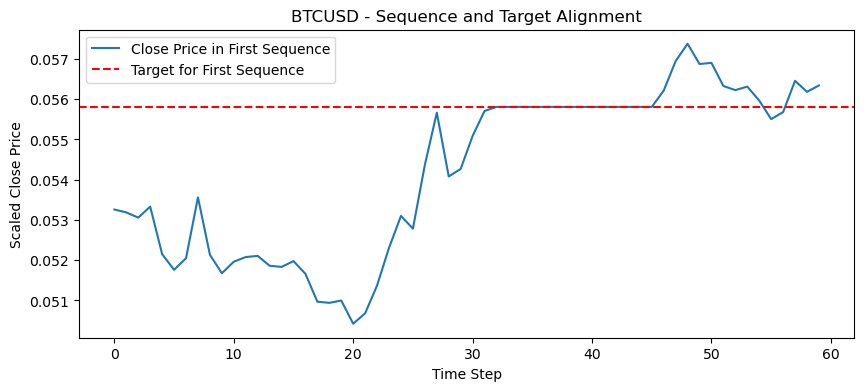

In [9]:
import matplotlib.pyplot as plt

for asset, (X, y) in lstm_sequences.items():
    plt.figure(figsize=(10, 4))
    plt.plot(range(len(X[0])), X[0][:, 0], label="Close Price in First Sequence")
    plt.axhline(y[0], color='r', linestyle='--', label="Target for First Sequence")
    plt.title(f"{asset} - Sequence and Target Alignment")
    plt.xlabel("Time Step")
    plt.ylabel("Scaled Close Price")
    plt.legend()
    plt.show()
    break 


In [10]:
train_ratio = 0.8
lstm_train_test = {}

for asset, (X, y) in lstm_sequences.items():
    train_size = int(len(X) * train_ratio)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    lstm_train_test[asset] = (X_train, X_test, y_train, y_test)    
    print(f"{asset}: Training samples = {len(X_train)}, Test samples = {len(X_test)}")

BTCUSD: Training samples = 31652, Test samples = 7913
ETHUSD: Training samples = 31618, Test samples = 7905
USA500.IDXUSD: Training samples = 25312, Test samples = 6329
XAUUSD: Training samples = 25298, Test samples = 6325
OJUICE.CMDUSX: Training samples = 17560, Test samples = 4390


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        LSTM(50),
        Dense(1)  
    ])
    model.compile(optimizer='adam', loss='mse')
    return model


In [12]:
epochs = 10  
batch_size = 32
models = {}

for asset, (X_train, X_test, y_train, y_test) in lstm_train_test.items():
    print(f"Training LSTM model for {asset}")
    model = build_lstm_model((X_train.shape[1], X_train.shape[2]))
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))
    models[asset] = model

Training LSTM model for BTCUSD


C:\Users\Sajeev\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
990/990 ━━━━━━━━━━━━━━━━━━━━ 77s 73ms/step - loss: 0.0018 - val_loss: 1.1930e-04
Epoch 2/10
990/990 ━━━━━━━━━━━━━━━━━━━━ 68s 69ms/step - loss: 7.0925e-05 - val_loss: 2.6502e-04
Epoch 3/10
990/990 ━━━━━━━━━━━━━━━━━━━━ 71s 72ms/step - loss: 4.8523e-05 - val_loss: 1.9233e-04
Epoch 4/10
990/990 ━━━━━━━━━━━━━━━━━━━━ 66s 67ms/step - loss: 5.3873e-05 - val_loss: 1.4490e-04
Epoch 5/10
990/990 ━━━━━━━━━━━━━━━━━━━━ 69s 70ms/step - loss: 4.4100e-05 - val_loss: 7.6139e-05
Epoch 6/10
990/990 ━━━━━━━━━━━━━━━━━━━━ 73s 73ms/step - loss: 3.5812e-05 - val_loss: 3.1393e-04
Epoch 7/10
990/990 ━━━━━━━━━━━━━━━━━━━━ 73s 73ms/step - loss: 3.5297e-05 - val_loss: 3.8092e-04
Epoch 8/10
990/990 ━━━━━━━━━━━━━━━━━━━━ 71s 72ms/step - loss: 3.2373e-05 - val_loss: 2.7544e-05
Epoch 9/10
990/990 ━━━━━━━━━━━━━━━━━━━━ 72s 73ms/step - loss: 2.6644e-05 - val_loss: 3.3158e-05
Epoch 10/10
990/990 ━━━━━━━━━━━━━━━━━━━━ 73s 74ms/step - loss: 2.3295e-05 - val_loss: 1.2088e-04
Training LSTM model for ETHUSD
Epoch 1/10
9

248/248 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step


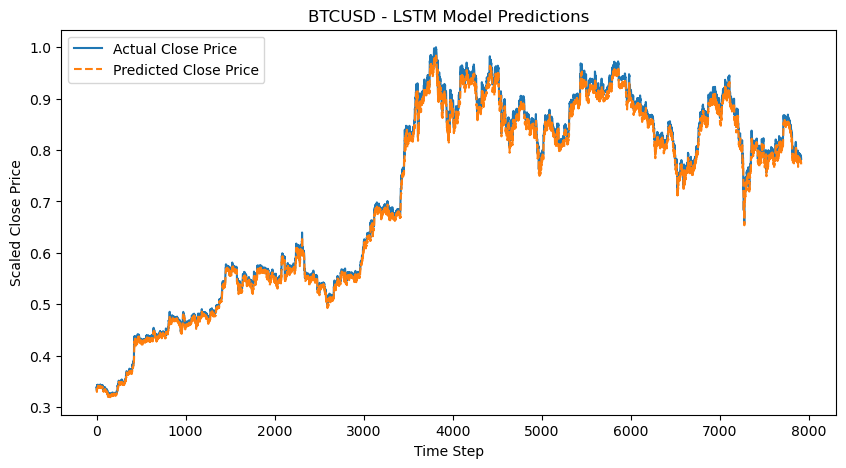

248/248 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step


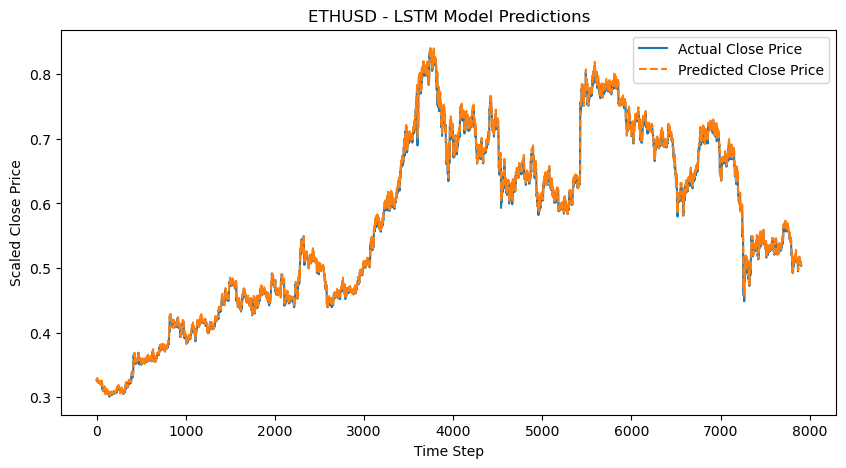

198/198 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step


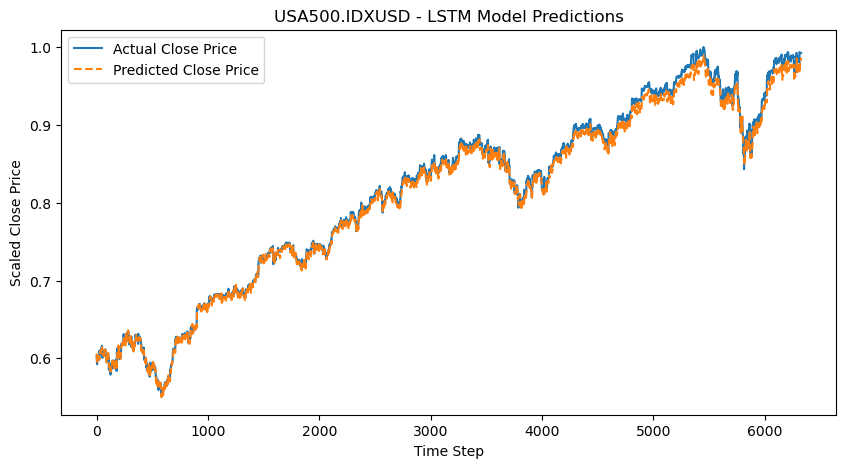

198/198 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step


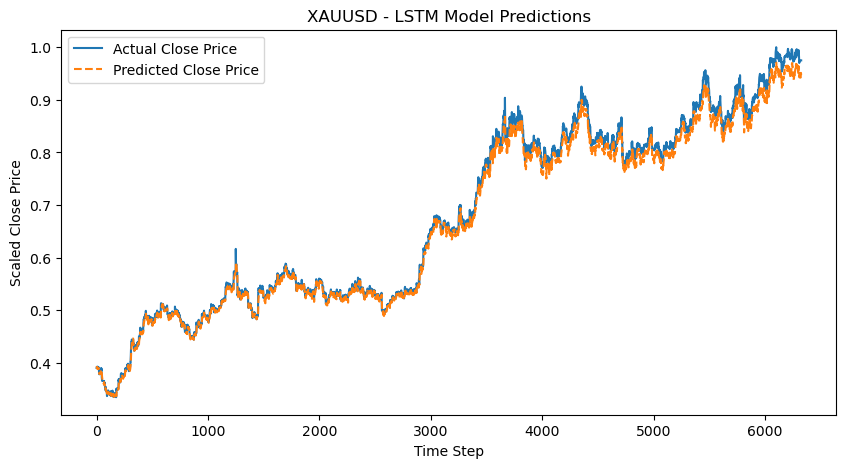

138/138 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step


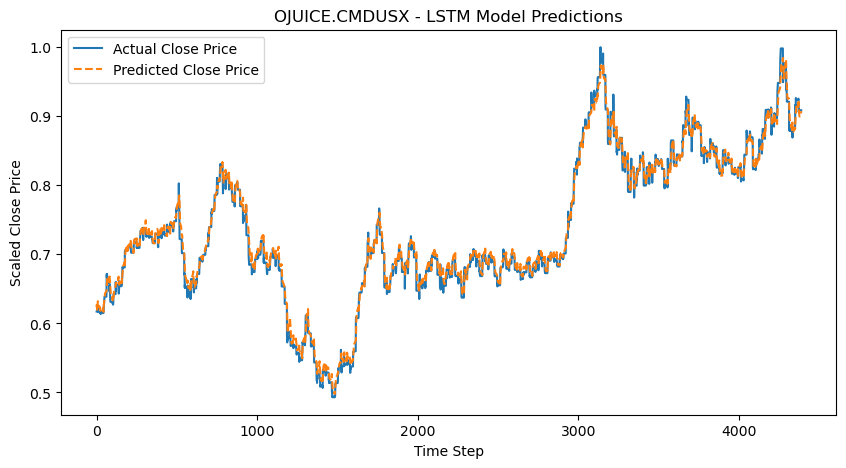

In [13]:
import matplotlib.pyplot as plt

for asset, (X_train, X_test, y_train, y_test) in lstm_train_test.items():
    model = models[asset]
    predictions = model.predict(X_test)
    plt.figure(figsize=(10, 5))
    plt.plot(y_test, label="Actual Close Price")
    plt.plot(predictions, label="Predicted Close Price", linestyle='dashed')
    plt.title(f"{asset} - LSTM Model Predictions")
    plt.xlabel("Time Step")
    plt.ylabel("Scaled Close Price")
    plt.legend()
    plt.show()

248/248 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step


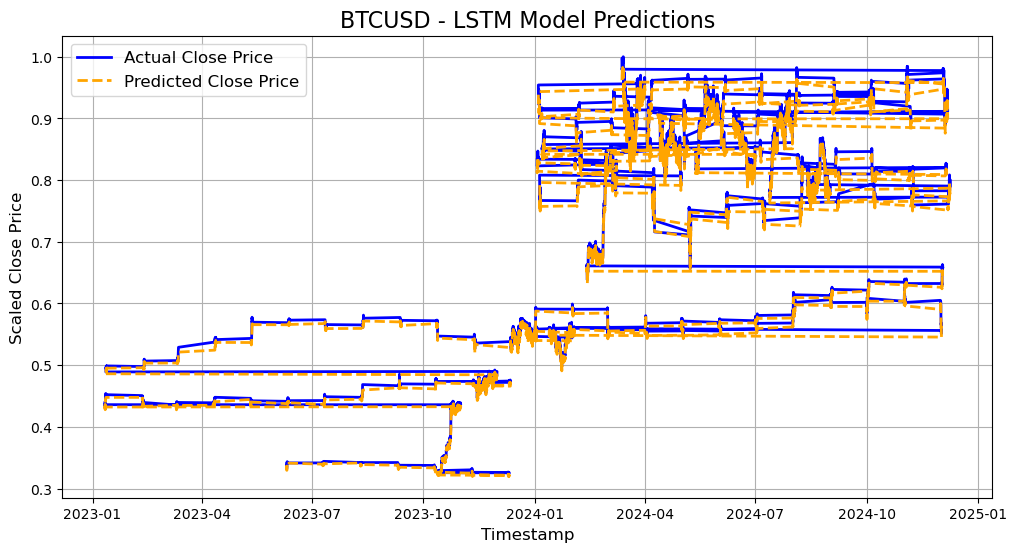

248/248 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step


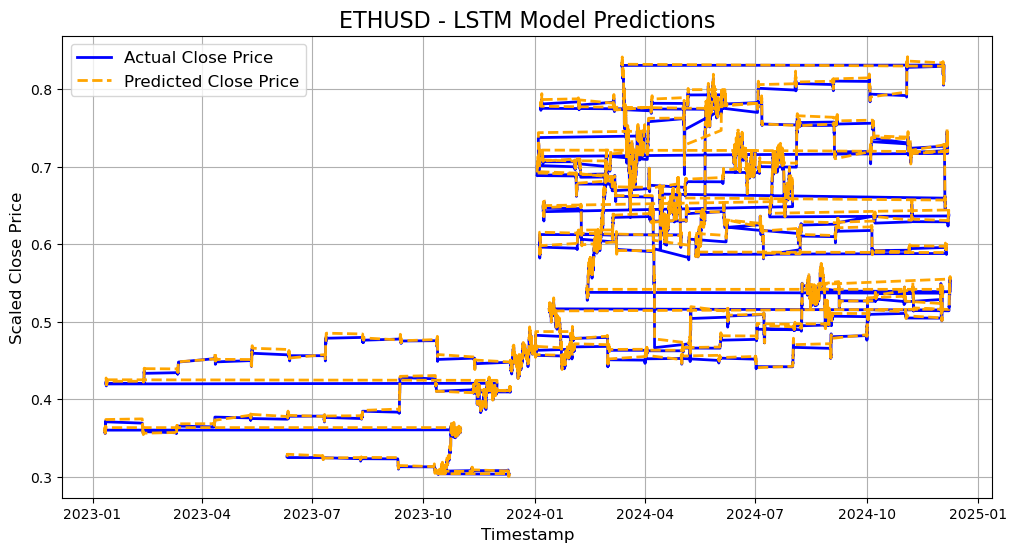

198/198 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step


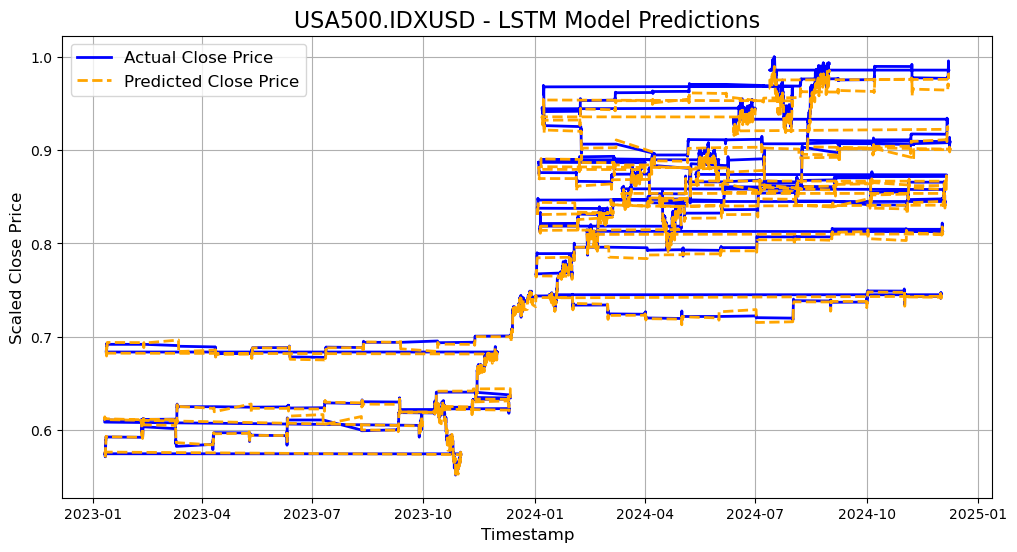

198/198 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step


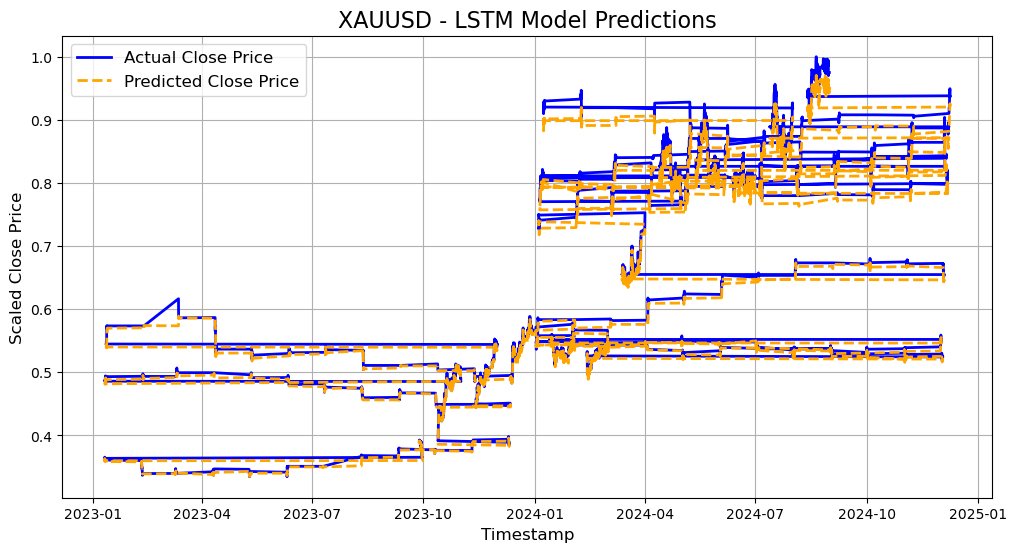

138/138 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step


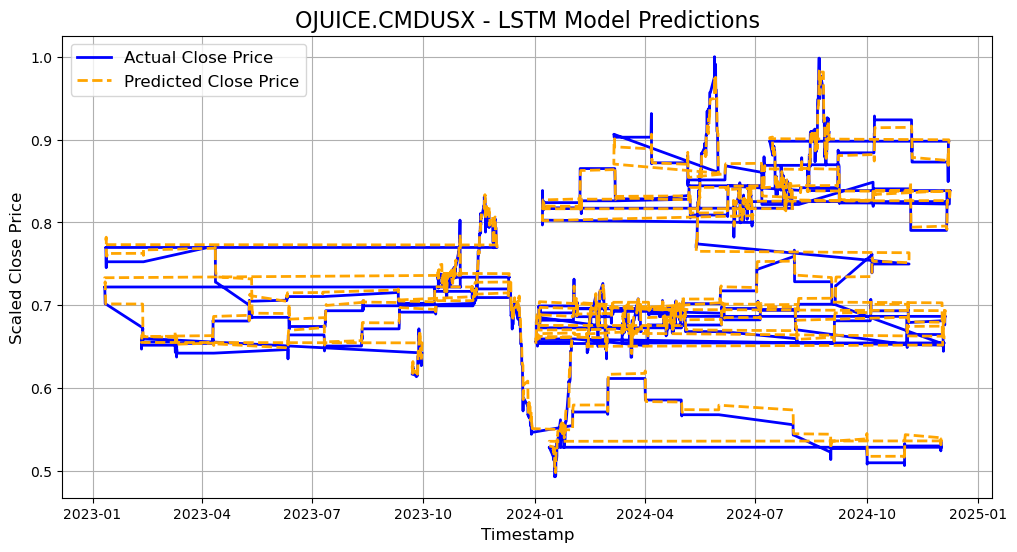

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_lstm_predictions_with_timestamps(asset, X_test, y_test, predictions, timestamps):
    """
    Visualizes LSTM predictions alongside actual values with timestamps as the x-axis.
    
    Parameters:
    - asset: Name of the asset (for labeling purposes).
    - X_test: Input test sequences (for shape consistency).
    - y_test: Actual target values from the test set.
    - predictions: LSTM model predictions for the test set.
    - timestamps: Datetime index or array corresponding to y_test.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(timestamps, y_test, label="Actual Close Price", color='blue', linewidth=2)
    plt.plot(timestamps, predictions, label="Predicted Close Price", color='orange', linestyle='dashed', linewidth=2)
    plt.title(f"{asset} - LSTM Model Predictions", fontsize=16)
    plt.xlabel("Timestamp", fontsize=12)
    plt.ylabel("Scaled Close Price", fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()


for asset, (X_train, X_test, y_train, y_test) in lstm_train_test.items():
    model = models[asset]
    predictions = model.predict(X_test)
    predictions = predictions.flatten()  
    timestamps = scaled_data[asset].index[-len(y_test):]  
    plot_lstm_predictions_with_timestamps(asset, X_test, y_test, predictions, timestamps)


In [31]:
def momentum_strategy(data, n=10):
    """
    Generate Momentum-based trading signals without LSTM.

    Parameters:
    - data: DataFrame with historical prices.
    - n: Look-back period for momentum.

    Returns:
    - DataFrame with 'signal' column.
    """
    data = data.copy()
    data['momentum'] = data['Close'] - data['Close'].shift(n)
    data['signal'] = 0
    data.loc[data['momentum'] > 0, 'signal'] = 1  # Buy signal
    data.loc[data['momentum'] < 0, 'signal'] = -1  # Sell signal
    return data.dropna()


In [32]:
def momentum_with_lstm(data, lstm_predictions, n=10):
    """
    Generate Momentum-based trading signals enhanced with LSTM predictions.

    Parameters:
    - data: DataFrame with historical prices.
    - lstm_predictions: LSTM predicted close prices.
    - n: Look-back period for momentum.

    Returns:
    - DataFrame with 'signal' column.
    """
    data = data.copy()
    data['momentum'] = data['Close'] - data['Close'].shift(n)
    data['lstm_pred'] = lstm_predictions
    data['signal'] = 0

    # Combine Momentum and LSTM predictions
    data.loc[(data['momentum'] > 0) & (data['lstm_pred'] > data['Close']), 'signal'] = 1  # Buy
    data.loc[(data['momentum'] < 0) & (data['lstm_pred'] < data['Close']), 'signal'] = -1  # Sell
    return data.dropna()


In [33]:
def macd_strategy(data, short_window=12, long_window=26, signal_window=9):
    """
    Generate MACD-based trading signals without LSTM.

    Parameters:
    - data: DataFrame with historical prices.
    - short_window, long_window, signal_window: MACD parameters.

    Returns:
    - DataFrame with 'signal' column.
    """
    data = data.copy()
    data['ema_short'] = data['Close'].ewm(span=short_window, adjust=False).mean()
    data['ema_long'] = data['Close'].ewm(span=long_window, adjust=False).mean()
    data['macd'] = data['ema_short'] - data['ema_long']
    data['signal_line'] = data['macd'].ewm(span=signal_window, adjust=False).mean()
    data['signal'] = 0

    # Generate MACD signals
    data.loc[data['macd'] > data['signal_line'], 'signal'] = 1  # Buy signal
    data.loc[data['macd'] < data['signal_line'], 'signal'] = -1  # Sell signal
    return data.dropna()


In [34]:
def macd_with_lstm(data, lstm_predictions, short_window=12, long_window=26, signal_window=9):
    """
    Generate MACD-based trading signals enhanced with LSTM predictions.

    Parameters:
    - data: DataFrame with historical prices.
    - lstm_predictions: LSTM predicted close prices.
    - short_window, long_window, signal_window: MACD parameters.

    Returns:
    - DataFrame with 'signal' column.
    """
    data = data.copy()
    data['ema_short'] = data['Close'].ewm(span=short_window, adjust=False).mean()
    data['ema_long'] = data['Close'].ewm(span=long_window, adjust=False).mean()
    data['macd'] = data['ema_short'] - data['ema_long']
    data['signal_line'] = data['macd'].ewm(span=signal_window, adjust=False).mean()
    data['lstm_pred'] = lstm_predictions
    data['signal'] = 0

    # Combine MACD and LSTM predictions
    data.loc[(data['macd'] > data['signal_line']) & (data['lstm_pred'] > data['Close']), 'signal'] = 1  # Buy
    data.loc[(data['macd'] < data['signal_line']) & (data['lstm_pred'] < data['Close']), 'signal'] = -1  # Sell
    return data.dropna()


In [35]:
def backtest_strategy(data, initial_balance=10000):
    """
    Backtest a trading strategy based on 'signal' column.

    Parameters:
    - data: DataFrame with 'Close' prices and 'signal'.
    - initial_balance: Starting balance for the portfolio.

    Returns:
    - results: Dictionary with final balance, cumulative return, and equity curve.
    """
    balance = initial_balance
    position = 0  # Current holdings (number of assets)
    equity_curve = []  # Track portfolio value over time

    for i in range(len(data)):
        current_price = data['Close'].iloc[i]

        # Execute trading signals
        if data['signal'].iloc[i] == 1:  # Buy signal
            if balance > 0:
                position = balance / current_price
                balance = 0
        elif data['signal'].iloc[i] == -1:  # Sell signal
            if position > 0:
                balance = position * current_price
                position = 0

        # Track portfolio value
        equity_curve.append(balance + position * current_price)

    # Final portfolio value
    final_balance = balance + position * data['Close'].iloc[-1]
    max_drawdown = (min(equity_curve) - max(equity_curve)) / max(equity_curve)  # Calculate max drawdown

    results = {
        "final_balance": final_balance,
        "cumulative_return": (final_balance - initial_balance) / initial_balance,
        "max_drawdown": max_drawdown,
        "equity_curve": equity_curve,
    }
    return results


In [36]:
def momentum_with_lstm_and_trailing_stop(data, lstm_predictions, n=10, trailing_stop_pct=0.05, initial_balance=10000):
    """
    Backtest Momentum strategy enhanced with LSTM predictions and trailing stop-loss.

    Parameters:
    - trailing_stop_pct: Percentage for the trailing stop-loss.
    """
    data = data.copy()
    data['momentum'] = data['Close'] - data['Close'].shift(n)
    data['lstm_pred'] = lstm_predictions

    balance = initial_balance
    position = 0
    equity_curve = []
    trailing_stop_price = None

    # Initialize signals with 0 for the entire DataFrame length
    signals = [0] * len(data)

    for i in range(len(data)):
        current_price = data['Close'].iloc[i]

        # Update trailing stop for long positions
        if position > 0:
            trailing_stop_price = max(trailing_stop_price, current_price * (1 - trailing_stop_pct))
            if current_price <= trailing_stop_price:
                balance = position * current_price
                position = 0
                trailing_stop_price = None
                signals[i] = -1  # Sell signal

        # Generate buy/sell signals
        if (data['momentum'].iloc[i] > 0) and (data['lstm_pred'].iloc[i] > current_price) and position == 0:
            position = balance / current_price
            balance = 0
            trailing_stop_price = current_price * (1 - trailing_stop_pct)
            signals[i] = 1  # Buy signal
        elif (data['momentum'].iloc[i] < 0) and (data['lstm_pred'].iloc[i] < current_price) and position > 0:
            balance = position * current_price
            position = 0
            trailing_stop_price = None
            signals[i] = -1  # Sell signal

        equity_curve.append(balance + position * current_price)

    # Ensure signals and equity_curve have consistent length with the DataFrame
    data['signal'] = signals
    return {
        "final_balance": balance + position * data['Close'].iloc[-1],
        "equity_curve": equity_curve,
        "data_with_signals": data
    }


In [37]:
def macd_with_lstm_and_trailing_stop(data, lstm_predictions, short_window=12, long_window=26, signal_window=9, trailing_stop_pct=0.05, initial_balance=10000):
    """
    Backtest MACD strategy enhanced with LSTM predictions and trailing stop-loss.
    """
    data = data.copy()
    data['ema_short'] = data['Close'].ewm(span=short_window, adjust=False).mean()
    data['ema_long'] = data['Close'].ewm(span=long_window, adjust=False).mean()
    data['macd'] = data['ema_short'] - data['ema_long']
    data['signal_line'] = data['macd'].ewm(span=signal_window, adjust=False).mean()
    data['lstm_pred'] = lstm_predictions

    balance = initial_balance
    position = 0
    equity_curve = []
    trailing_stop_price = None

    # Initialize signals with 0 for the entire DataFrame length
    signals = [0] * len(data)

    for i in range(len(data)):
        current_price = data['Close'].iloc[i]

        # Update trailing stop for long positions
        if position > 0:
            trailing_stop_price = max(trailing_stop_price, current_price * (1 - trailing_stop_pct))
            if current_price <= trailing_stop_price:
                balance = position * current_price
                position = 0
                trailing_stop_price = None
                signals[i] = -1  # Sell signal

        # Generate buy/sell signals
        if (data['macd'].iloc[i] > data['signal_line'].iloc[i]) and (data['lstm_pred'].iloc[i] > current_price) and position == 0:
            position = balance / current_price
            balance = 0
            trailing_stop_price = current_price * (1 - trailing_stop_pct)
            signals[i] = 1  # Buy signal
        elif (data['macd'].iloc[i] < data['signal_line'].iloc[i]) and (data['lstm_pred'].iloc[i] < current_price) and position > 0:
            balance = position * current_price
            position = 0
            trailing_stop_price = None
            signals[i] = -1  # Sell signal

        equity_curve.append(balance + position * current_price)

    # Ensure signals and equity_curve have consistent length with the DataFrame
    data['signal'] = signals
    return {
        "final_balance": balance + position * data['Close'].iloc[-1],
        "equity_curve": equity_curve,
        "data_with_signals": data
    }


In [38]:
results_dict = {}

for asset, lstm_predictions in predictions_dict.items():
    test_data = scaled_data[asset].iloc[-len(lstm_predictions):]

    # Phase 1: MOM vs. MOM with LSTM
    mom_data = momentum_strategy(test_data)
    mom_lstm_data = momentum_with_lstm(test_data, lstm_predictions)

    mom_results = backtest_strategy(mom_data)
    mom_lstm_results = backtest_strategy(mom_lstm_data)

    macd_data = macd_strategy(test_data)
    macd_lstm_data = macd_with_lstm(test_data, lstm_predictions)

    macd_results = backtest_strategy(macd_data)
    macd_lstm_results = backtest_strategy(macd_lstm_data)

    # Phase 2: MOM with LSTM and trailing stop-loss
    mom_lstm_trailing_results = momentum_with_lstm_and_trailing_stop(test_data, lstm_predictions)

    # MACD with LSTM and trailing stop-loss
    macd_lstm_trailing_results = macd_with_lstm_and_trailing_stop(test_data, lstm_predictions)

    # Store results for both comparisons
    results_dict[asset] = {
        "Phase1": {
            "MOM_Without_LSTM": mom_results,
            "MOM_With_LSTM": mom_lstm_results,
            "MACD_Without_LSTM": macd_results,
            "MACD_With_LSTM": macd_lstm_results,
        },
        "Phase2": {
            "MOM_With_LSTM_Trailing_Stop": mom_lstm_trailing_results,
            "MACD_With_LSTM_Trailing_Stop": macd_lstm_trailing_results,
        },
    }

    # Print Phase 1 Results
    print(f"Phase 1 Results for {asset}:")
    for strategy, results in results_dict[asset]['Phase1'].items():
        print(f"{strategy} -> Final Balance: ${results['final_balance']:.2f}")

    # Print Phase 2 Results
    print(f"Phase 2 Results for {asset}:")
    for strategy, results in results_dict[asset]['Phase2'].items():
        print(f"{strategy} -> Final Balance: ${results['final_balance']:.2f}")


Phase 1 Results for BTCUSD:
MOM_Without_LSTM -> Final Balance: $16138.66
MOM_With_LSTM -> Final Balance: $11277.86
MACD_Without_LSTM -> Final Balance: $17348.25
MACD_With_LSTM -> Final Balance: $11457.06
Phase 2 Results for BTCUSD:
MOM_With_LSTM_Trailing_Stop -> Final Balance: $11277.86
MACD_With_LSTM_Trailing_Stop -> Final Balance: $11261.52
Phase 1 Results for ETHUSD:
MOM_Without_LSTM -> Final Balance: $20037.43
MOM_With_LSTM -> Final Balance: $16324.29
MACD_Without_LSTM -> Final Balance: $17454.43
MACD_With_LSTM -> Final Balance: $13216.67
Phase 2 Results for ETHUSD:
MOM_With_LSTM_Trailing_Stop -> Final Balance: $15594.57
MACD_With_LSTM_Trailing_Stop -> Final Balance: $12342.89
Phase 1 Results for USA500.IDXUSD:
MOM_Without_LSTM -> Final Balance: $12587.07
MOM_With_LSTM -> Final Balance: $12658.33
MACD_Without_LSTM -> Final Balance: $13236.66
MACD_With_LSTM -> Final Balance: $11704.04
Phase 2 Results for USA500.IDXUSD:
MOM_With_LSTM_Trailing_Stop -> Final Balance: $12658.33
MACD_Wit

In [23]:
predictions_dict = {}

for asset, (X_train, X_test, y_train, y_test) in lstm_train_test.items():
    model = models[asset]  # Retrieve the trained model for the asset
    predictions = model.predict(X_test).flatten()  # Generate predictions and flatten them
    predictions_dict[asset] = predictions  # Store predictions in the dictionary

248/248 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step
248/248 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step
198/198 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step
198/198 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step


In [24]:
predictions_dict

{'BTCUSD': array([0.33506897, 0.33509701, 0.3364235 , ..., 0.7761689 , 0.77686584,
        0.7721678 ], dtype=float32),
 'ETHUSD': array([0.32788745, 0.32819775, 0.3284189 , ..., 0.5068063 , 0.5054475 ,
        0.5036282 ], dtype=float32),
 'USA500.IDXUSD': array([0.6063431 , 0.60406876, 0.60021466, ..., 0.984689  , 0.98531806,
        0.98449004], dtype=float32),
 'XAUUSD': array([0.393343  , 0.39161995, 0.39170444, ..., 0.95121104, 0.9485048 ,
        0.94749457], dtype=float32),
 'OJUICE.CMDUSX': array([0.62371945, 0.6267298 , 0.62379175, ..., 0.9019359 , 0.9023879 ,
        0.9074927 ], dtype=float32)}

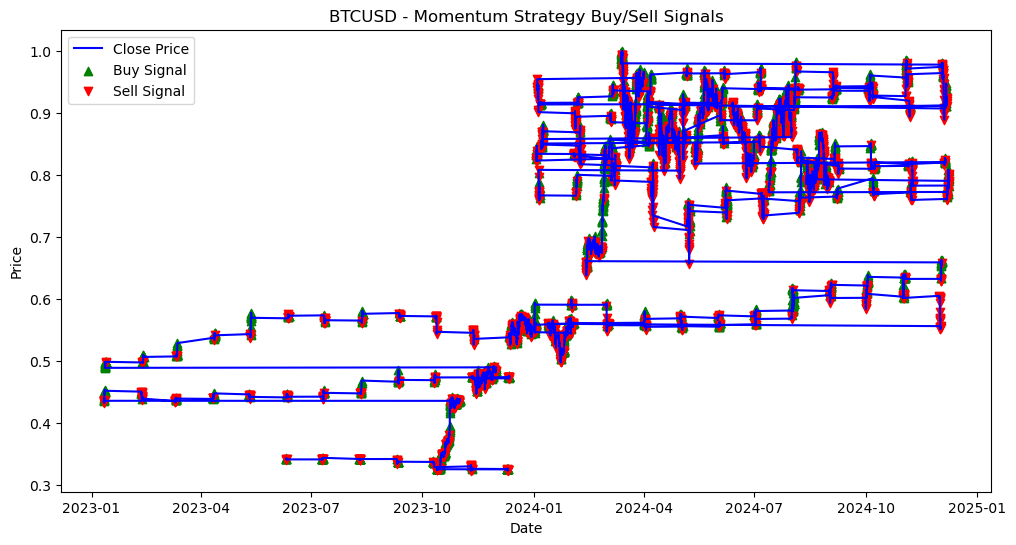

BTCUSD - Momentum Strategy: Total Buy Signals = 4191, Total Sell Signals = 3698


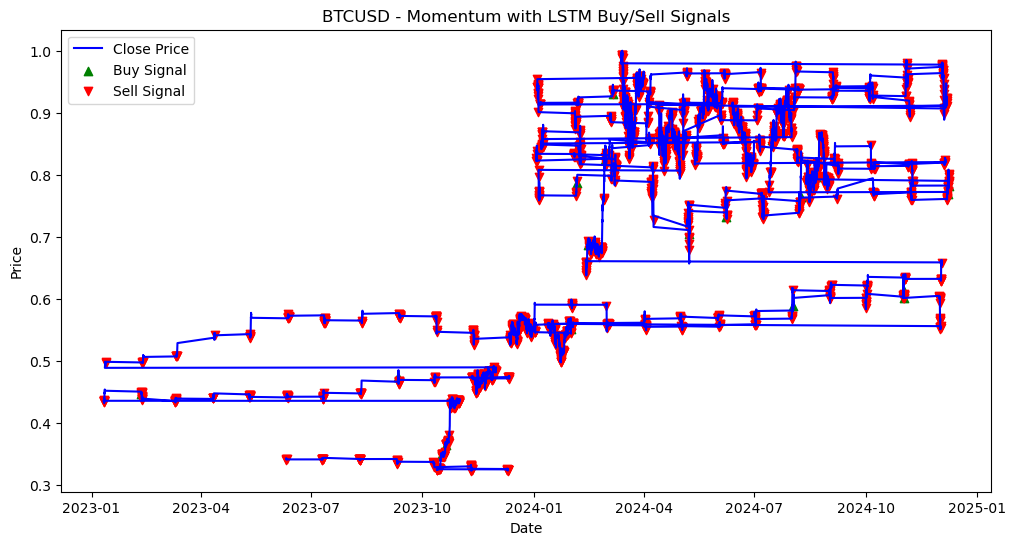

BTCUSD - Momentum with LSTM: Total Buy Signals = 27, Total Sell Signals = 3549


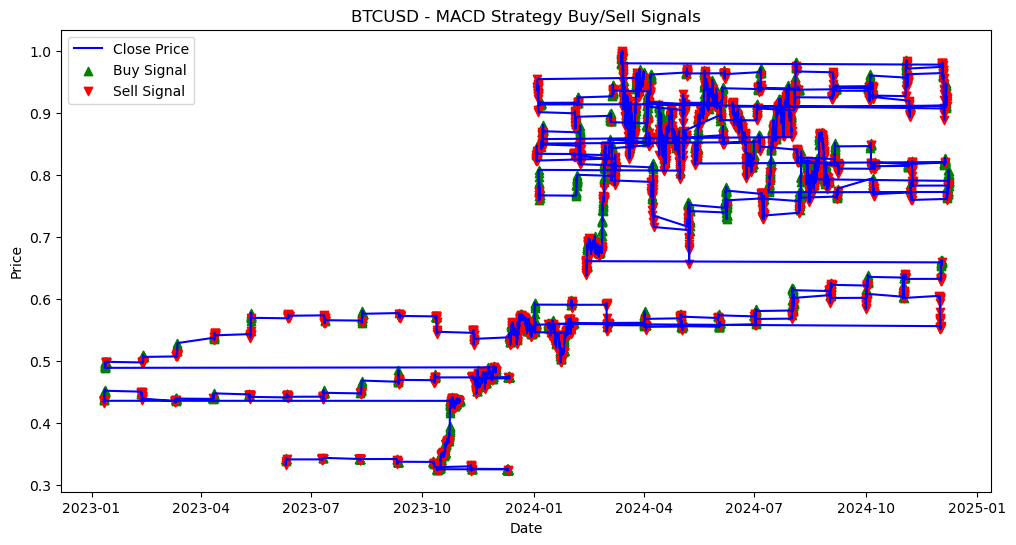

BTCUSD - MACD Strategy: Total Buy Signals = 3823, Total Sell Signals = 4089


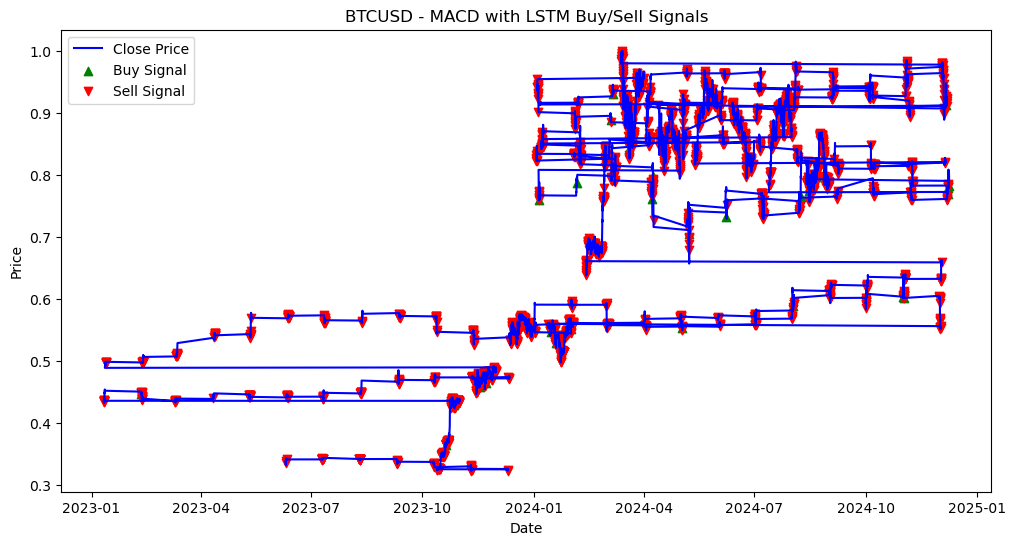

BTCUSD - MACD with LSTM: Total Buy Signals = 46, Total Sell Signals = 3957


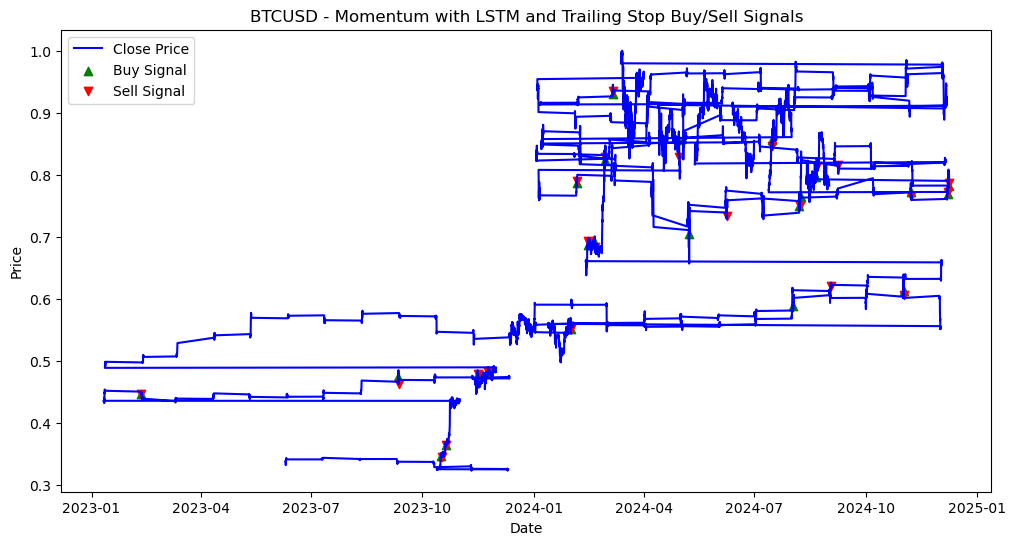

BTCUSD - Momentum with LSTM and Trailing Stop: Total Buy Signals = 24, Total Sell Signals = 24


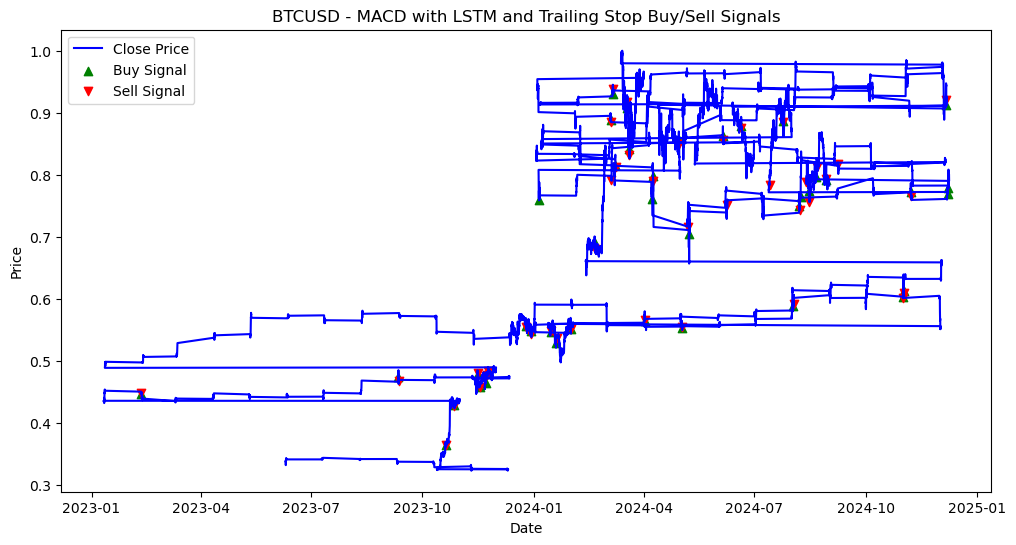

BTCUSD - MACD with LSTM and Trailing Stop: Total Buy Signals = 41, Total Sell Signals = 41


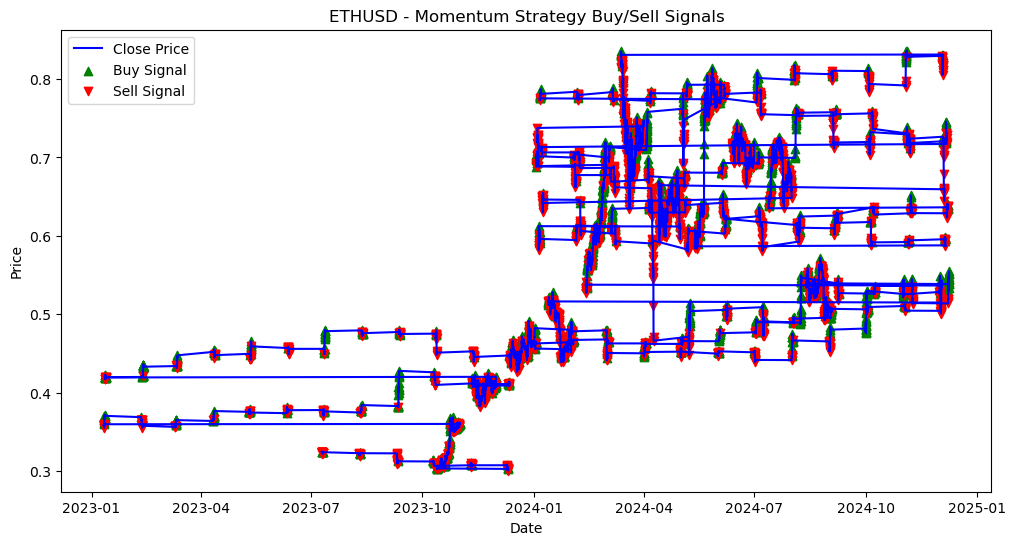

ETHUSD - Momentum Strategy: Total Buy Signals = 4024, Total Sell Signals = 3751


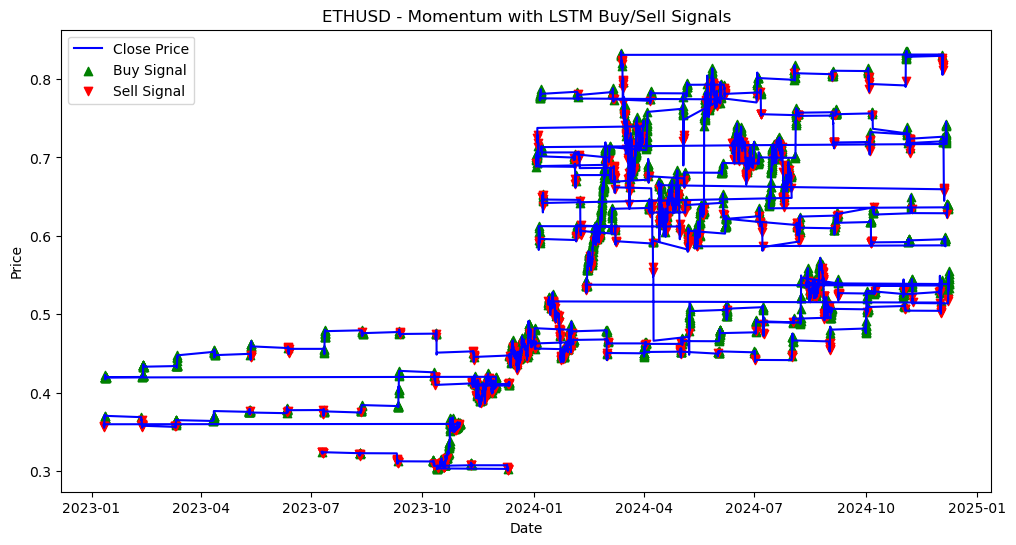

ETHUSD - Momentum with LSTM: Total Buy Signals = 3151, Total Sell Signals = 868


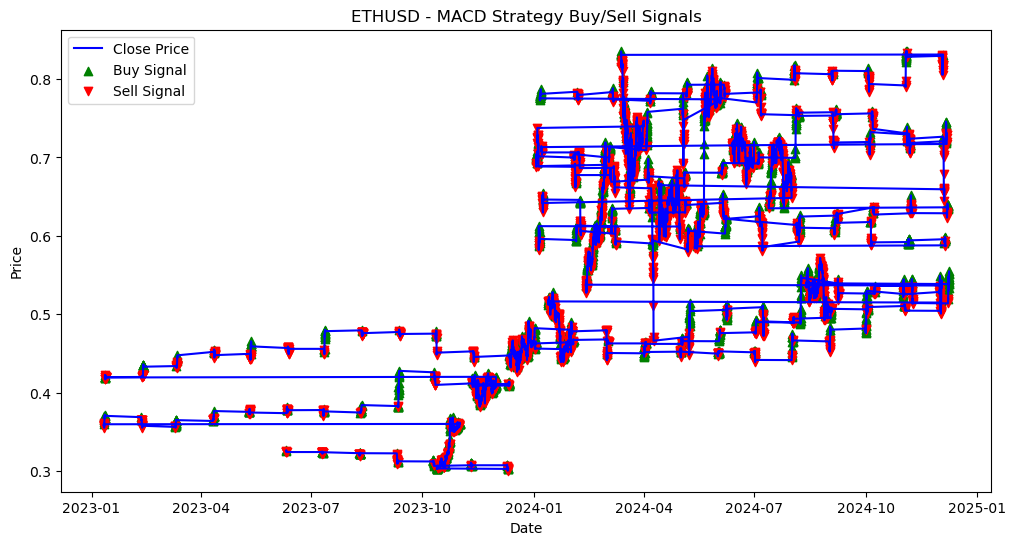

ETHUSD - MACD Strategy: Total Buy Signals = 3940, Total Sell Signals = 3962


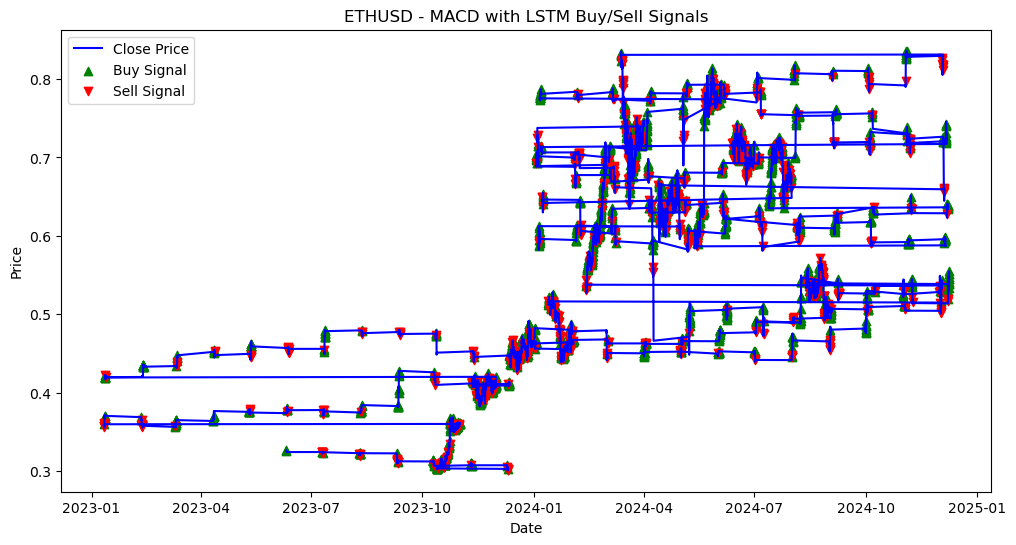

ETHUSD - MACD with LSTM: Total Buy Signals = 3158, Total Sell Signals = 988


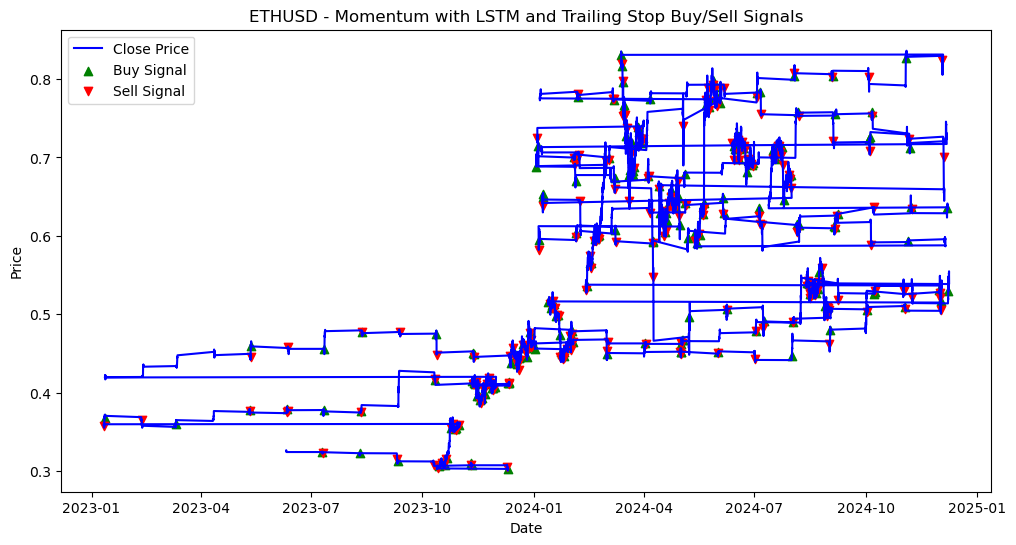

ETHUSD - Momentum with LSTM and Trailing Stop: Total Buy Signals = 229, Total Sell Signals = 229


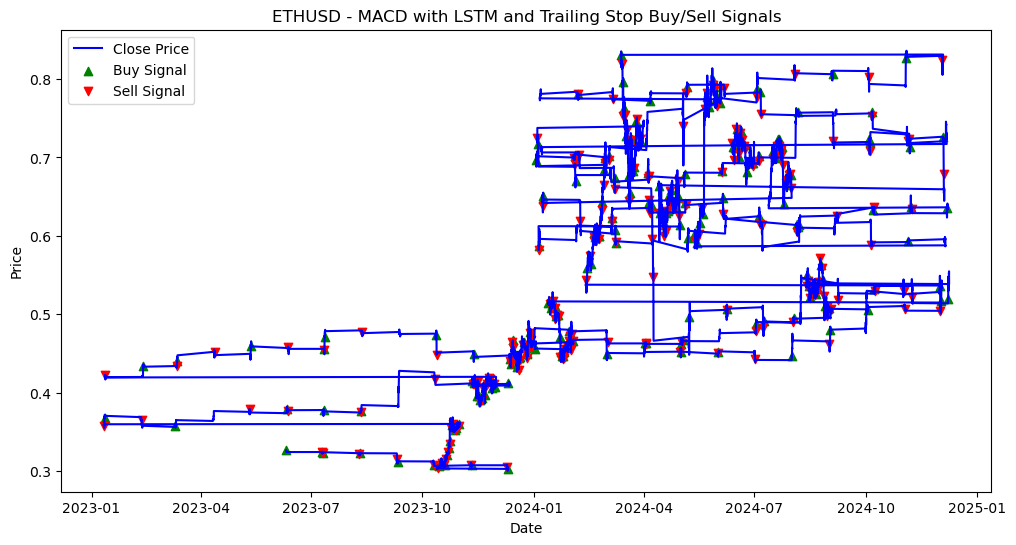

ETHUSD - MACD with LSTM and Trailing Stop: Total Buy Signals = 228, Total Sell Signals = 227


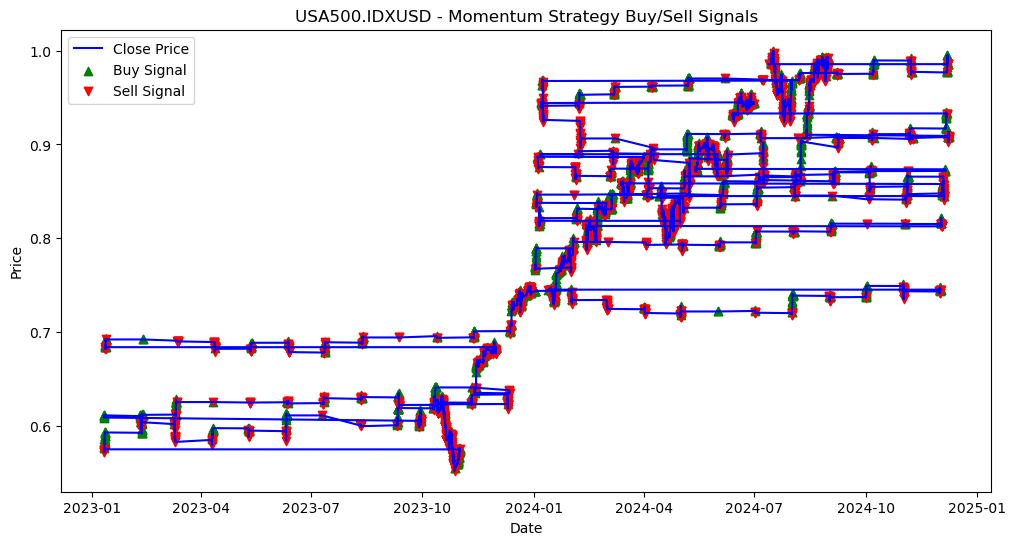

USA500.IDXUSD - Momentum Strategy: Total Buy Signals = 3506, Total Sell Signals = 2616


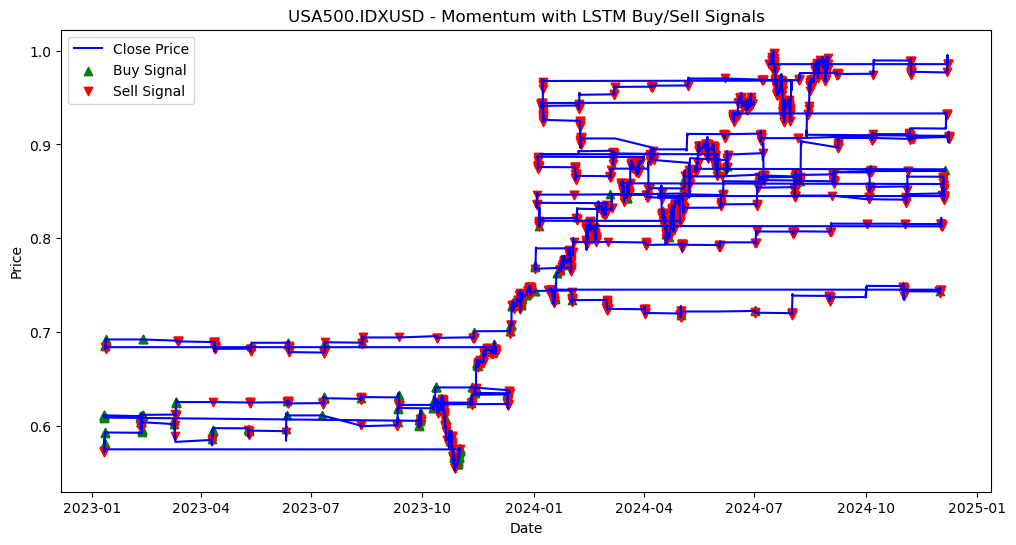

USA500.IDXUSD - Momentum with LSTM: Total Buy Signals = 328, Total Sell Signals = 2180


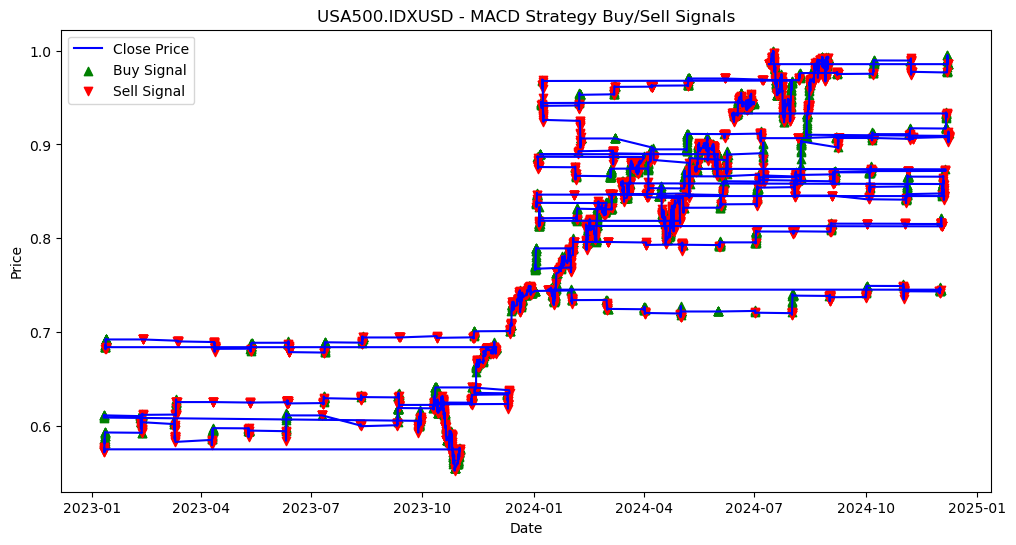

USA500.IDXUSD - MACD Strategy: Total Buy Signals = 3028, Total Sell Signals = 3300


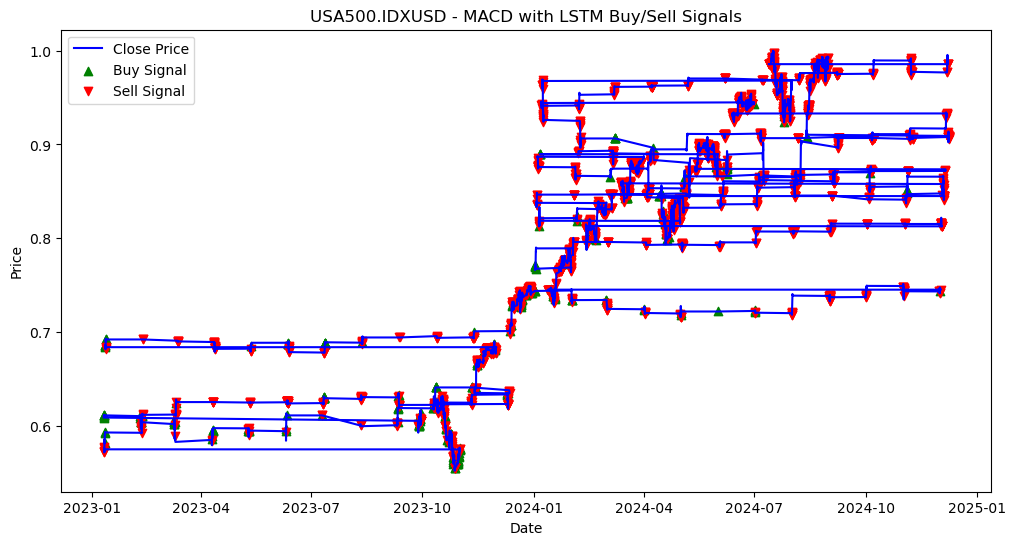

USA500.IDXUSD - MACD with LSTM: Total Buy Signals = 371, Total Sell Signals = 2869


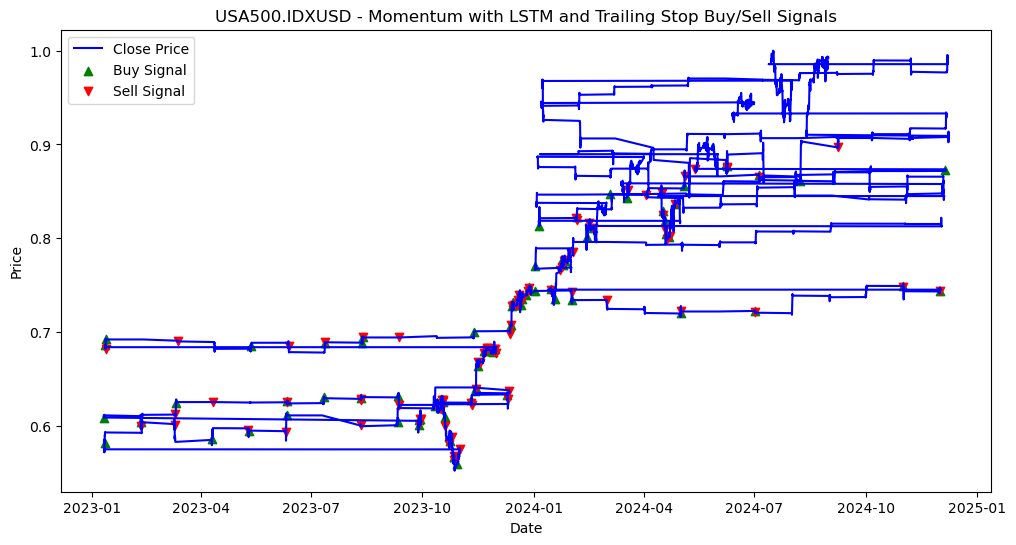

USA500.IDXUSD - Momentum with LSTM and Trailing Stop: Total Buy Signals = 87, Total Sell Signals = 87


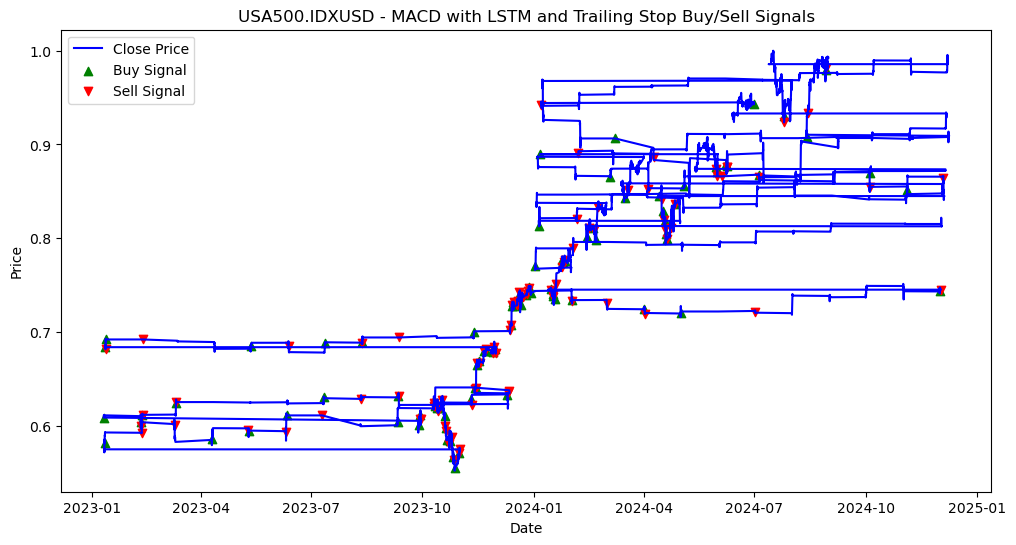

USA500.IDXUSD - MACD with LSTM and Trailing Stop: Total Buy Signals = 91, Total Sell Signals = 91


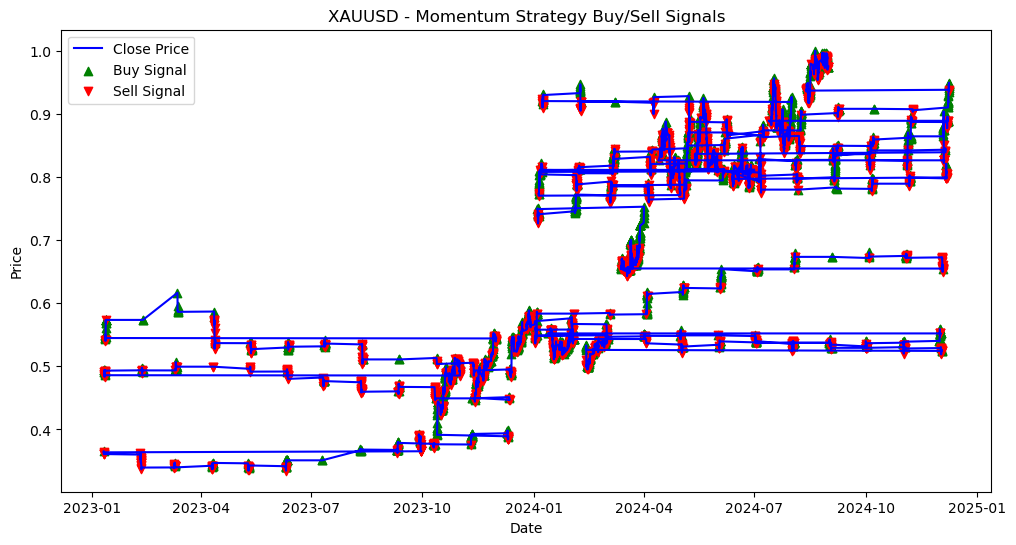

XAUUSD - Momentum Strategy: Total Buy Signals = 3362, Total Sell Signals = 2757


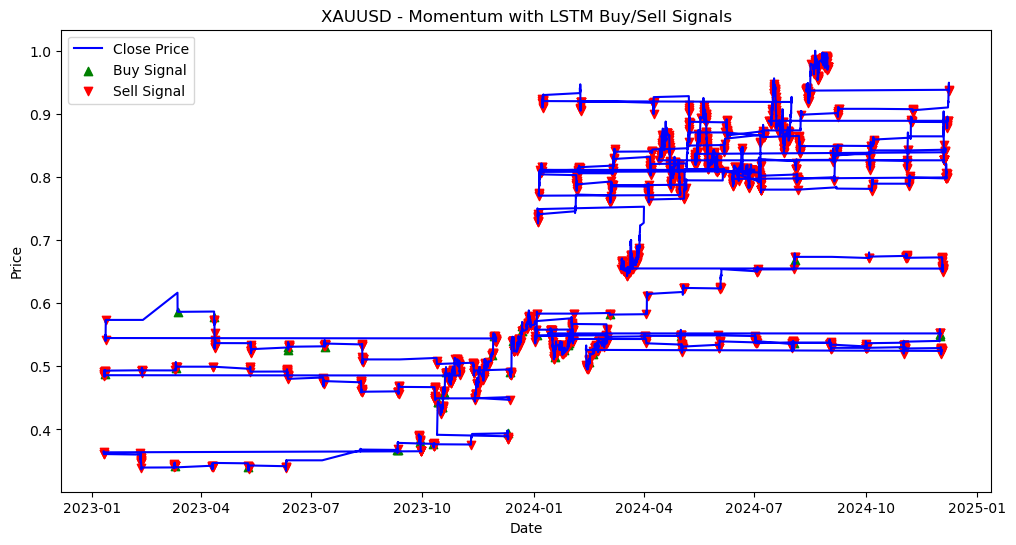

XAUUSD - Momentum with LSTM: Total Buy Signals = 58, Total Sell Signals = 2477


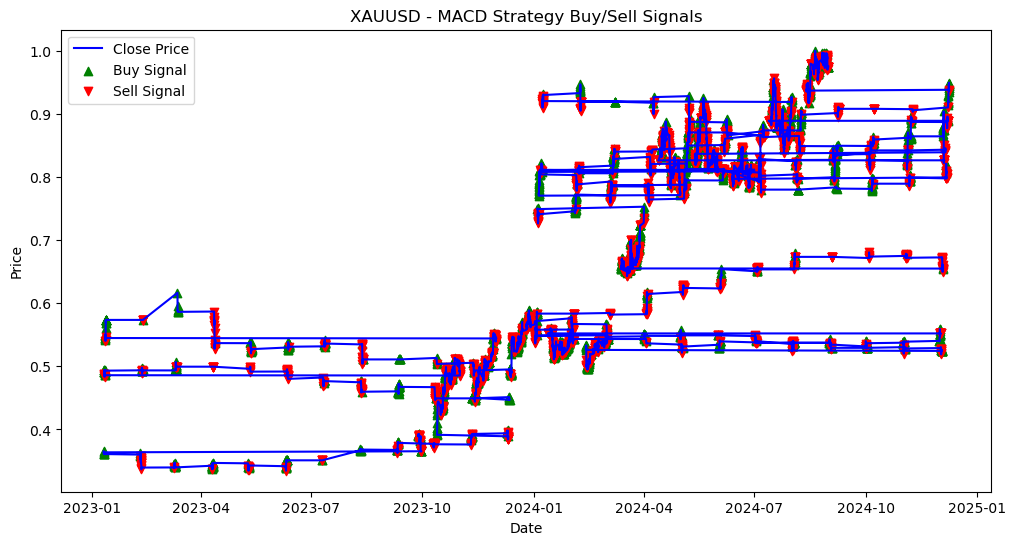

XAUUSD - MACD Strategy: Total Buy Signals = 3158, Total Sell Signals = 3166


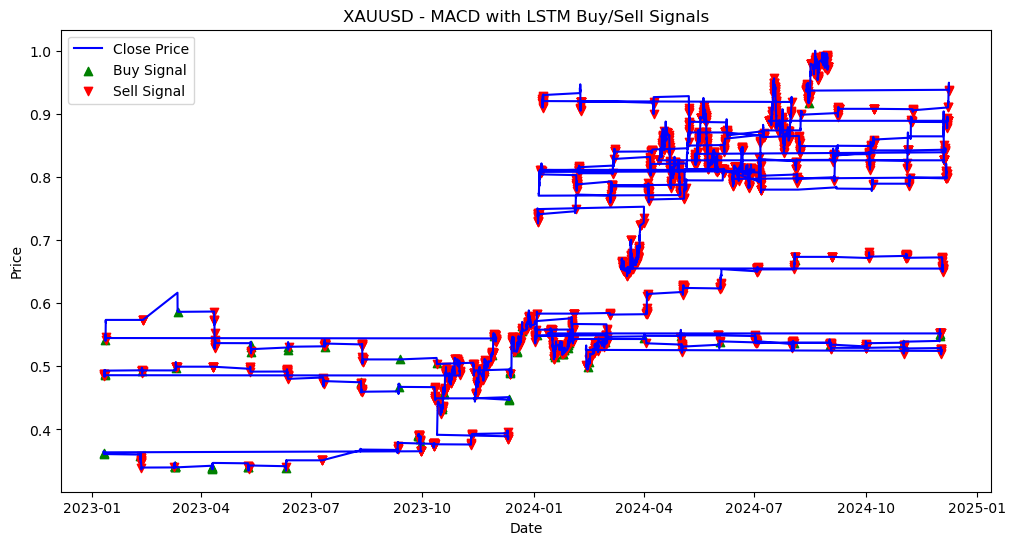

XAUUSD - MACD with LSTM: Total Buy Signals = 92, Total Sell Signals = 2909


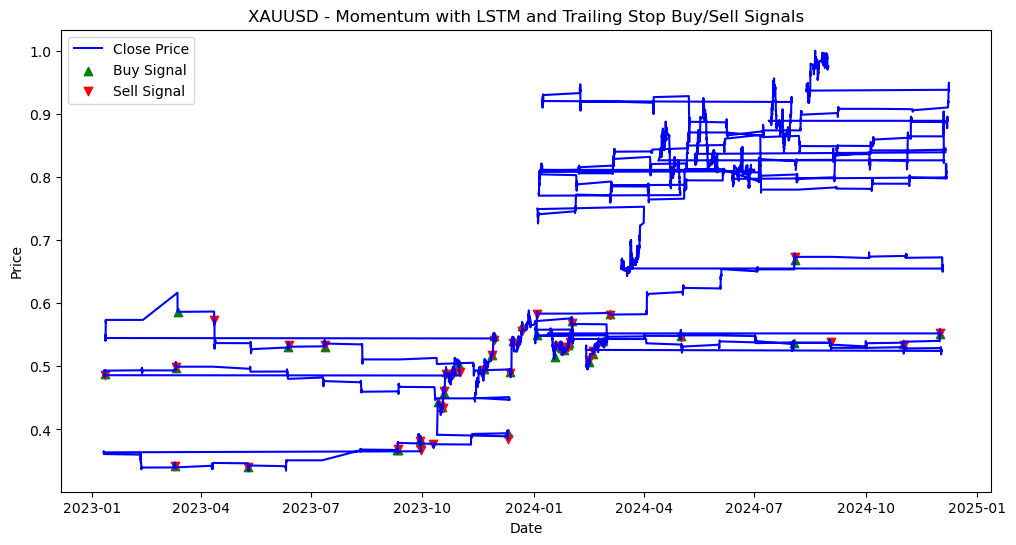

XAUUSD - Momentum with LSTM and Trailing Stop: Total Buy Signals = 41, Total Sell Signals = 41


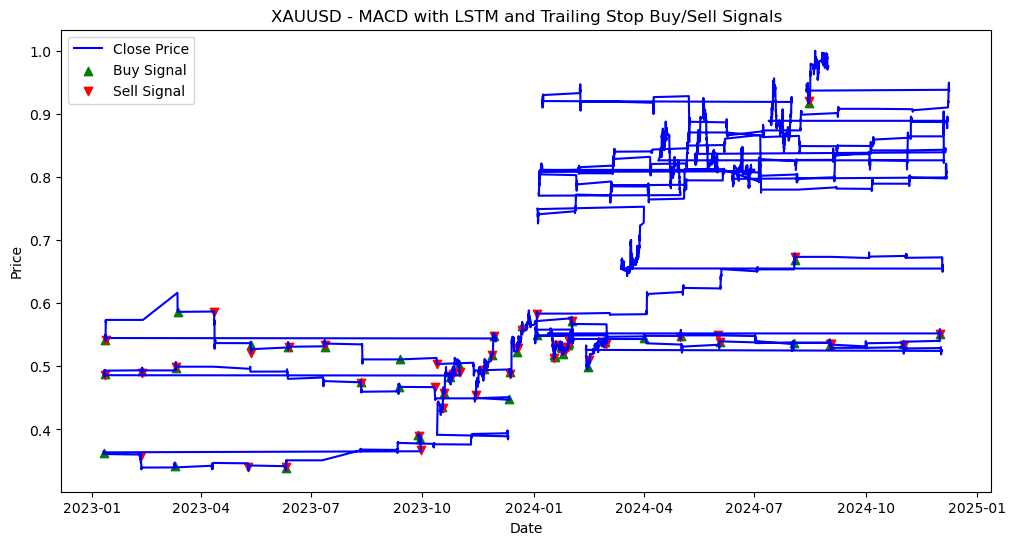

XAUUSD - MACD with LSTM and Trailing Stop: Total Buy Signals = 49, Total Sell Signals = 49


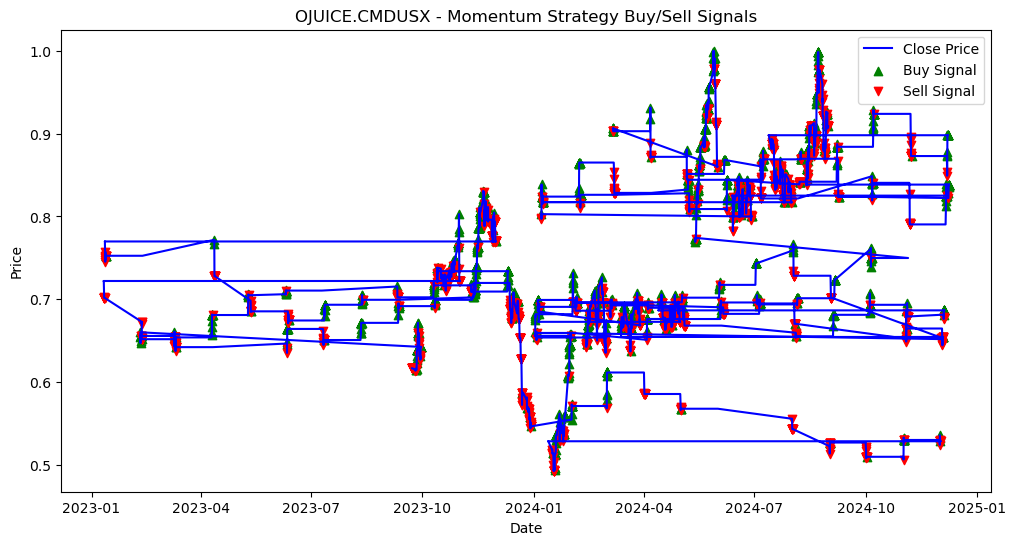

OJUICE.CMDUSX - Momentum Strategy: Total Buy Signals = 1809, Total Sell Signals = 1621


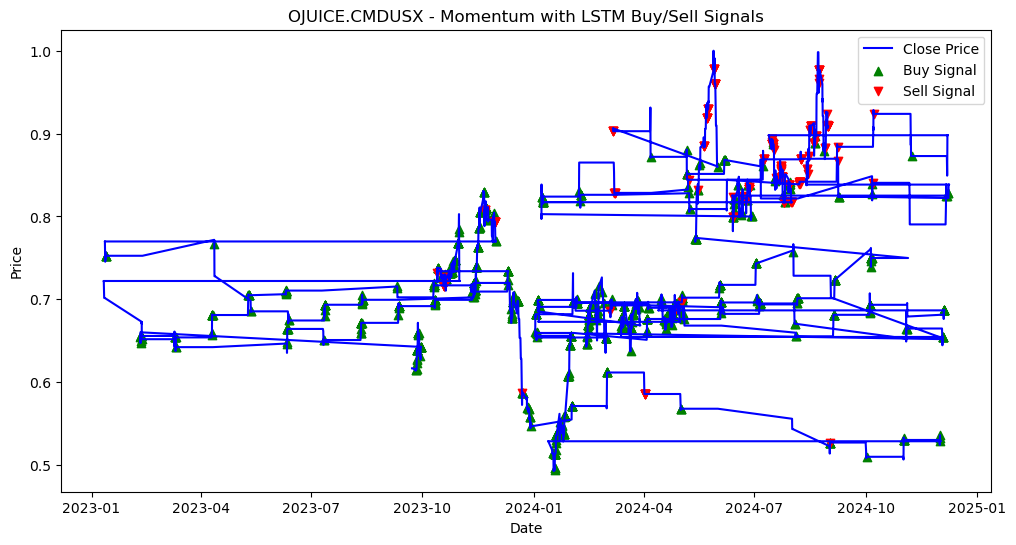

OJUICE.CMDUSX - Momentum with LSTM: Total Buy Signals = 1013, Total Sell Signals = 207


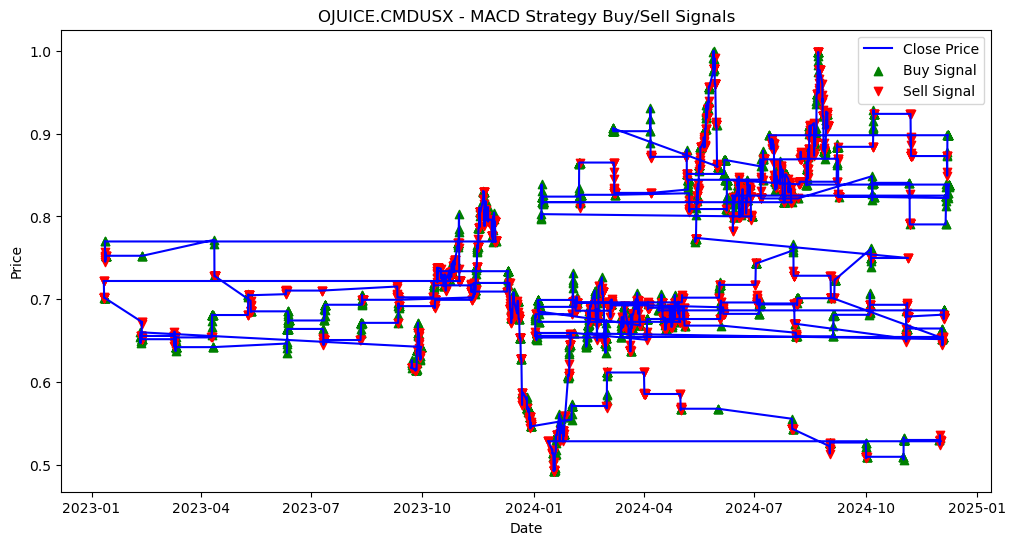

OJUICE.CMDUSX - MACD Strategy: Total Buy Signals = 2129, Total Sell Signals = 2256


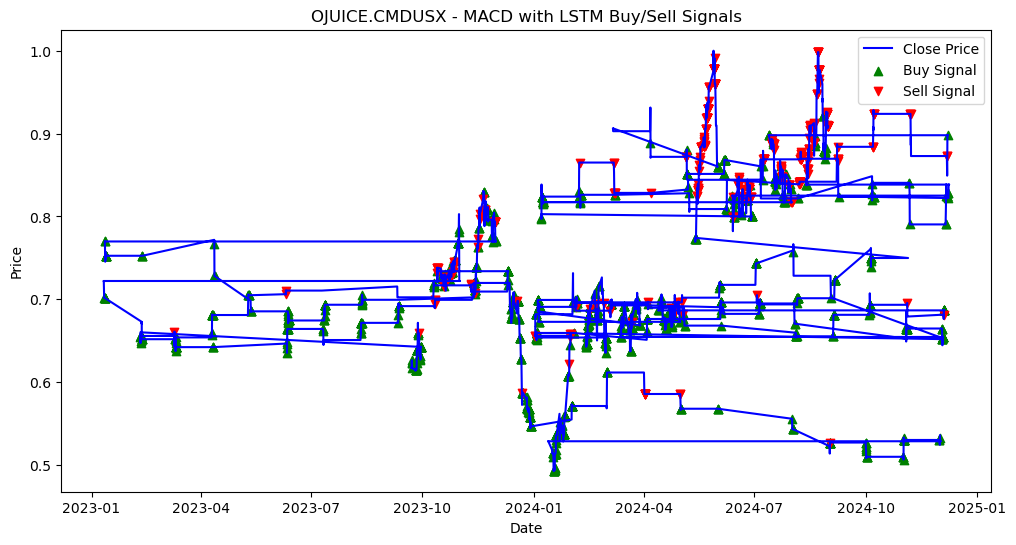

OJUICE.CMDUSX - MACD with LSTM: Total Buy Signals = 1379, Total Sell Signals = 430


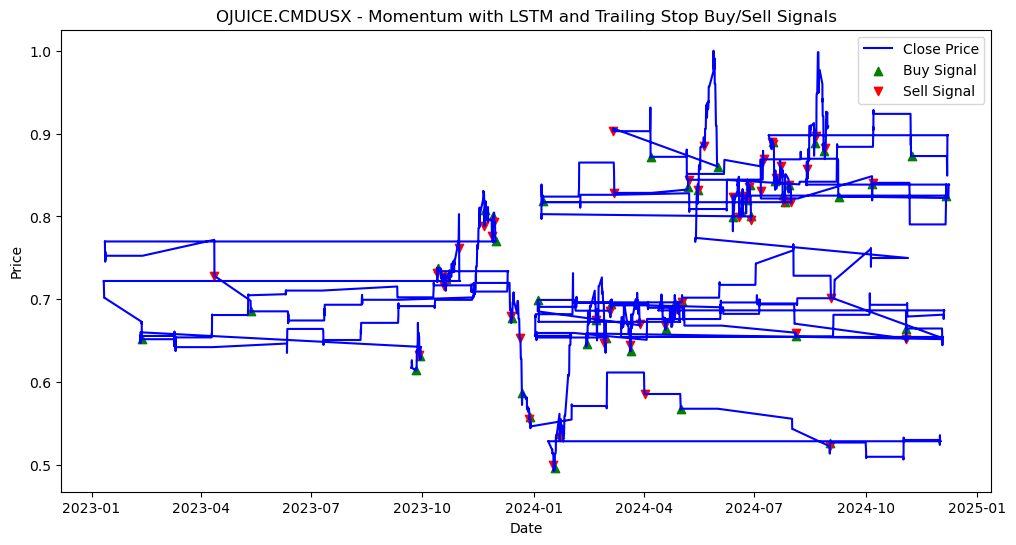

OJUICE.CMDUSX - Momentum with LSTM and Trailing Stop: Total Buy Signals = 51, Total Sell Signals = 51


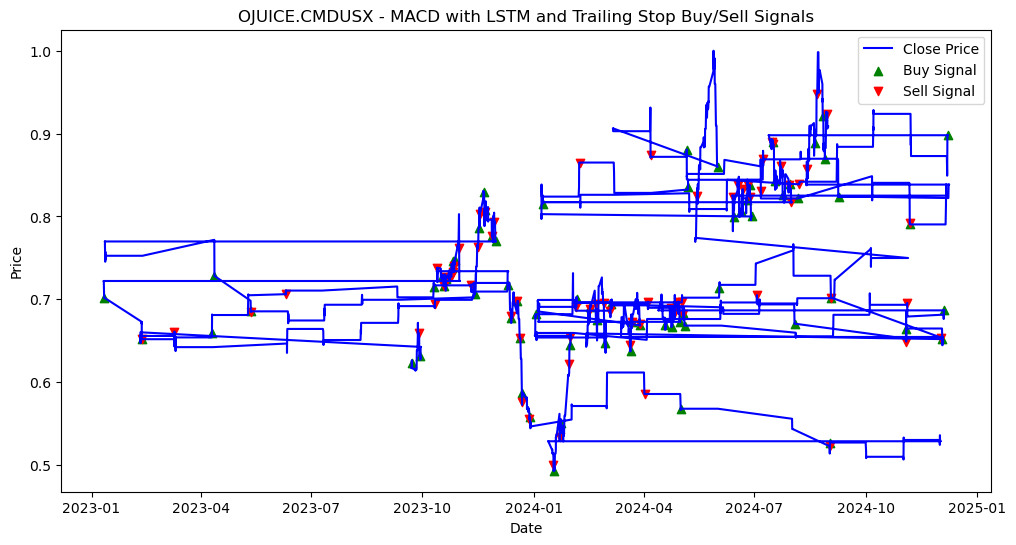

OJUICE.CMDUSX - MACD with LSTM and Trailing Stop: Total Buy Signals = 73, Total Sell Signals = 70

Final Strategy Results:
            Asset   Phase                      Strategy  Final Balance  \
0          BTCUSD  Phase1              MOM_Without_LSTM   16138.656977   
1          BTCUSD  Phase1                 MOM_With_LSTM   11277.860148   
2          BTCUSD  Phase1             MACD_Without_LSTM   17348.249132   
3          BTCUSD  Phase1                MACD_With_LSTM   11457.058583   
4          BTCUSD  Phase2   MOM_With_LSTM_Trailing_Stop   11277.860148   
5          BTCUSD  Phase2  MACD_With_LSTM_Trailing_Stop   11261.524783   
6          ETHUSD  Phase1              MOM_Without_LSTM   20037.432329   
7          ETHUSD  Phase1                 MOM_With_LSTM   16324.287195   
8          ETHUSD  Phase1             MACD_Without_LSTM   17454.425057   
9          ETHUSD  Phase1                MACD_With_LSTM   13216.672011   
10         ETHUSD  Phase2   MOM_With_LSTM_Trailing_Stop   15594

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_buy_sell_signals_with_counts(data, asset_name, strategy_name):
    """
    Plots buy/sell signals and prints the count of buy and sell signals.
    Parameters:
    - data: DataFrame containing the 'Close' prices and 'signal' column.
    - asset_name: Name of the asset (for labeling purposes).
    - strategy_name: Name of the strategy (for labeling purposes).
    """
    buy_signals = data[data['signal'] == 1]
    sell_signals = data[data['signal'] == -1]
    
    # Count signals
    total_buy_signals = len(buy_signals)
    total_sell_signals = len(sell_signals)
    
    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Close'], label="Close Price", color="blue")
    plt.scatter(buy_signals.index, buy_signals['Close'], label="Buy Signal", marker="^", color="green")
    plt.scatter(sell_signals.index, sell_signals['Close'], label="Sell Signal", marker="v", color="red")
    plt.title(f"{asset_name} - {strategy_name} Buy/Sell Signals")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.show()
    
    # Print counts
    print(f"{asset_name} - {strategy_name}: Total Buy Signals = {total_buy_signals}, Total Sell Signals = {total_sell_signals}")

# Enhanced loop to include visualizations and results in DataFrame
final_results = []

for asset, lstm_predictions in predictions_dict.items():
    test_data = scaled_data[asset].iloc[-len(lstm_predictions):]

    # Phase 1: MOM vs. MOM with LSTM
    mom_data = momentum_strategy(test_data)
    mom_lstm_data = momentum_with_lstm(test_data, lstm_predictions)

    mom_results = backtest_strategy(mom_data)
    mom_lstm_results = backtest_strategy(mom_lstm_data)

    macd_data = macd_strategy(test_data)
    macd_lstm_data = macd_with_lstm(test_data, lstm_predictions)

    macd_results = backtest_strategy(macd_data)
    macd_lstm_results = backtest_strategy(macd_lstm_data)

    # Phase 2: MOM with LSTM and trailing stop-loss
    mom_lstm_trailing_results = momentum_with_lstm_and_trailing_stop(test_data, lstm_predictions)

    # MACD with LSTM and trailing stop-loss
    macd_lstm_trailing_results = macd_with_lstm_and_trailing_stop(test_data, lstm_predictions)

    # Store results for both comparisons
    results_dict[asset] = {
        "Phase1": {
            "MOM_Without_LSTM": mom_results,
            "MOM_With_LSTM": mom_lstm_results,
            "MACD_Without_LSTM": macd_results,
            "MACD_With_LSTM": macd_lstm_results,
        },
        "Phase2": {
            "MOM_With_LSTM_Trailing_Stop": mom_lstm_trailing_results,
            "MACD_With_LSTM_Trailing_Stop": macd_lstm_trailing_results,
        },
    }

    # Visualizations for Phase 1
    plot_buy_sell_signals_with_counts(mom_data, asset, "Momentum Strategy")
    plot_buy_sell_signals_with_counts(mom_lstm_data, asset, "Momentum with LSTM")
    plot_buy_sell_signals_with_counts(macd_data, asset, "MACD Strategy")
    plot_buy_sell_signals_with_counts(macd_lstm_data, asset, "MACD with LSTM")

    # Visualizations for Phase 2
    trailing_mom_data = mom_lstm_trailing_results["data_with_signals"]
    plot_buy_sell_signals_with_counts(trailing_mom_data, asset, "Momentum with LSTM and Trailing Stop")
    #plot_equity_curve(mom_lstm_trailing_results["equity_curve"], asset, "Momentum with LSTM and Trailing Stop")

    trailing_macd_data = macd_lstm_trailing_results["data_with_signals"]
    plot_buy_sell_signals_with_counts(trailing_macd_data, asset, "MACD with LSTM and Trailing Stop")
    #plot_equity_curve(macd_lstm_trailing_results["equity_curve"], asset, "MACD with LSTM and Trailing Stop")


    # Collect results for DataFrame
    for phase, strategies in results_dict[asset].items():
        for strategy, results in strategies.items():
            final_results.append({
                "Asset": asset,
                "Phase": phase,
                "Strategy": strategy,
                "Final Balance": results["final_balance"],
                "Cumulative Return": results.get("cumulative_return", None),
                "Max Drawdown": results.get("max_drawdown", None),
            })

# Convert final results to DataFrame
final_results_df = pd.DataFrame(final_results)

# Display the DataFrame
print("\nFinal Strategy Results:")
print(final_results_df)
